# WeatherPy
----

### Analysis

* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

7a61e52ec7bd94ad476d93febca4b2d8


### Initiate Lists to Store Responses

* Ensure random combinations of coordinates are stored in a list using numpy
* Based upon coord, ensure cities are stored in a list using citipy
* Print the total count of cities to check if sufficient (at least 500)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Create Query URL

In [4]:
# Declare the querying URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = base_url +"appid="+ api_key + "&units="+ units +"&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=7a61e52ec7bd94ad476d93febca4b2d8&units=metric&q='

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [10]:
## DO NOT RUN THIS CELL AFTER INITIALLY EXECUTING
# Set City Count vars

citycount = 0
citycountfail = 0

# Create Lists for Each Column 

city_list = []         
cloudiness = []   
country = []      
date = []         
humidity = []    
lat = []          
lng = []          
MaxTemp = []      
WindSpeed = []  


for city in cities:

    citycount = citycount + 1
    
    print("Retrieving data for index " + str(citycount) + " " + city)
    
    try:
        weatherdetails = requests.get(query_url + city).json()
        city_list.append (weatherdetails["name"])
        cloudiness.append (weatherdetails["clouds"]["all"])
        country.append (weatherdetails["sys"]["country"])
        date.append (weatherdetails["dt"])
        humidity.append (weatherdetails["main"]["humidity"])
        lat.append (weatherdetails["coord"]["lat"])
        lng.append (weatherdetails["coord"]["lon"])
        MaxTemp.append (weatherdetails["main"]["temp_max"])
        WindSpeed.append (weatherdetails["wind"]["speed"])
        
    except:
        citycountfail = citycountfail + 1
        print("Error retrieving data for " + city)
        print("Error Code: " + str(weatherdetails ['cod']))
#        print("Message: " + weatherdetails['message'])

pprint(weatherdetails)        
print("Data Retrieval Complete....")
print("---------------------------------------------------------")
print("Number of cities weather data  not found: " + str(citycountfail))   

Retrieving data for index 1 taolanaro
Error retrieving data for taolanaro
Error Code: 404
Retrieving data for index 2 kapaa
Retrieving data for index 3 butaritari
Retrieving data for index 4 mataura
Retrieving data for index 5 barentsburg
Error retrieving data for barentsburg
Error Code: 404
Retrieving data for index 6 rikitea
Retrieving data for index 7 castro
Retrieving data for index 8 nikolskoye
Retrieving data for index 9 hermanus
Retrieving data for index 10 illoqqortoormiut
Error retrieving data for illoqqortoormiut
Error Code: 404
Retrieving data for index 11 whitehorse
Retrieving data for index 12 iqaluit
Retrieving data for index 13 vaini
Retrieving data for index 14 atuona
Retrieving data for index 15 avera
Retrieving data for index 16 najran
Retrieving data for index 17 bredasdorp
Retrieving data for index 18 cabo san lucas
Retrieving data for index 19 saint george
Retrieving data for index 20 tumannyy
Error retrieving data for tumannyy
Error Code: 404
Retrieving data for i

Retrieving data for index 184 palmer
Retrieving data for index 185 yulara
Retrieving data for index 186 havoysund
Retrieving data for index 187 ylivieska
Retrieving data for index 188 merauke
Retrieving data for index 189 robertsport
Retrieving data for index 190 along
Retrieving data for index 191 cam pha
Error retrieving data for cam pha
Error Code: 404
Retrieving data for index 192 mar del plata
Retrieving data for index 193 tobane
Retrieving data for index 194 zarate
Retrieving data for index 195 treinta y tres
Retrieving data for index 196 caluquembe
Retrieving data for index 197 vardo
Retrieving data for index 198 acarau
Error retrieving data for acarau
Error Code: 404
Retrieving data for index 199 komsomolskiy
Retrieving data for index 200 kashan
Retrieving data for index 201 rawson
Retrieving data for index 202 viedma
Retrieving data for index 203 devils lake
Retrieving data for index 204 guiyang
Retrieving data for index 205 bilibino
Retrieving data for index 206 bulaevo
Retri

Retrieving data for index 369 mackay
Retrieving data for index 370 haines junction
Retrieving data for index 371 mavur
Error retrieving data for mavur
Error Code: 404
Retrieving data for index 372 olafsvik
Error retrieving data for olafsvik
Error Code: 404
Retrieving data for index 373 xai-xai
Retrieving data for index 374 mafinga
Error retrieving data for mafinga
Error Code: 404
Retrieving data for index 375 zhigansk
Retrieving data for index 376 chokurdakh
Retrieving data for index 377 meyungs
Error retrieving data for meyungs
Error Code: 404
Retrieving data for index 378 ulaangom
Retrieving data for index 379 hanting
Retrieving data for index 380 loandjili
Retrieving data for index 381 tuatapere
Retrieving data for index 382 nadym
Retrieving data for index 383 port blair
Retrieving data for index 384 canavieiras
Retrieving data for index 385 moengo
Retrieving data for index 386 salinopolis
Retrieving data for index 387 namibe
Retrieving data for index 388 tasbuget
Error retrieving d

Retrieving data for index 544 mackenzie
Retrieving data for index 545 uvat
Retrieving data for index 546 mapastepec
Retrieving data for index 547 tual
Retrieving data for index 548 palabuhanratu
Error retrieving data for palabuhanratu
Error Code: 404
Retrieving data for index 549 dekoa
Error retrieving data for dekoa
Error Code: 404
Retrieving data for index 550 iroquois falls
Retrieving data for index 551 vestmanna
Retrieving data for index 552 pangody
Retrieving data for index 553 itaituba
Retrieving data for index 554 aleksandrovskiy zavod
Retrieving data for index 555 rapar
Retrieving data for index 556 emba
Retrieving data for index 557 nanga eboko
Retrieving data for index 558 chara
Retrieving data for index 559 mutsu
Retrieving data for index 560 mbeya
Retrieving data for index 561 paamiut
Retrieving data for index 562 qui nhon
Error retrieving data for qui nhon
Error Code: 404
Retrieving data for index 563 atar
Retrieving data for index 564 tabas
Retrieving data for index 565 f

### Double-Check Lengths 
(Not to exceed 638) (Ensure interrupting kernel didn't cause issues)

In [11]:
print(len(city_list))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lng))
print(len(MaxTemp))
print(len(WindSpeed))

515
515
515
515
515
515
515
515
515


## Store All Responses in DF

* Then, export into a .csv saved in Resources folder

In [12]:
#Store all responses into a DataFrame 

weather_df = pd.DataFrame ({
    "City": city_list,
    "Cloudiness": cloudiness,
    "Country_code": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": MaxTemp,
    "Wind Speed": WindSpeed
})

weather_df.head()

,City,Cloudiness,Country_code,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kapaa,20,US,1554430696,57,22.08,-159.32,27.00,4.10
1,Butaritari,48,KI,1554431167,100,3.07,172.79,26.30,2.31
2,Mataura,80,NZ,1554430805,60,-46.19,168.86,11.11,1.34
3,Rikitea,20,PF,1554431168,100,-23.12,-134.97,24.95,7.46
4,Castro,20,CL,1554429600,100,-42.48,-73.76,7.00,1.50


### Export .csv

In [13]:
# Export CSV to crossreference

weather_df.to_csv("weatherdata.csv",index=False,header=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 9 columns):
City            515 non-null object
Cloudiness      515 non-null int64
Country_code    515 non-null object
Date            515 non-null int64
Humidity        515 non-null int64
Latitude        515 non-null float64
Longitude       515 non-null float64
Max Temp        515 non-null float64
Wind Speed      515 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 36.3+ KB


## Create Scatterplots 

* Four scatterplots are created in relation to latitude: 
    - Latitude (lat) vs. Temperature (MaxTemp)
    - Latitude (lat) vs. Humidity (humidity)
    - Latitude (lat) vs. Cloudiness (cloudiness)
    - Latitude (lat) vs. Wind Speed (WindSpeed)

** Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
** Save the plotted figures as .pngs.

### Latitudinal Relationship to Maximum Temperature (CURRENTLY C - CONV TO F)

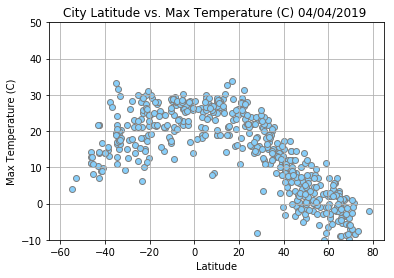

In [61]:
# Create Scatterplots
x_axis = weather_df['Latitude']
plt.xlabel("Latitude")
y_axis_temp = weather_df['Max Temp']
y_axis_humidity = weather_df['Humidity']
y_axis_cloudiness = weather_df['Cloudiness']
y_axis_windspeed = weather_df['Wind Speed']

# Maximum Temperature Relationship
## Currently in C, convert to F

plt.xlim(-65, 85)
plt.ylim(-10, 50)
plt.title("City Latitude vs. Max Temperature (C) 04/04/2019 ")
plt.grid()
plt.ylabel("Max Temperature (C)")
plt.scatter(x_axis, y_axis_temp,facecolor="lightskyblue", edgecolor="gray")

# Save Figure
plt.savefig("../Images/LatitudeVsMaxTemp.png")
plt.show()

### Latitudinal Relationship to Humidity

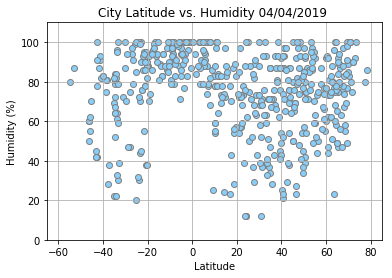

In [62]:
# Humidity Relationship

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-65, 85)
plt.ylim(0, 110)
plt.title("City Latitude vs. Humidity 04/04/2019 ")
plt.grid()
plt.scatter(x_axis, y_axis_humidity,facecolor="lightskyblue", edgecolor="gray")

# Save Figure
plt.savefig("../Images/LatitudeVsHumidityPct.png")
plt.show()

### Latitudinal Relationship to Cloudiness

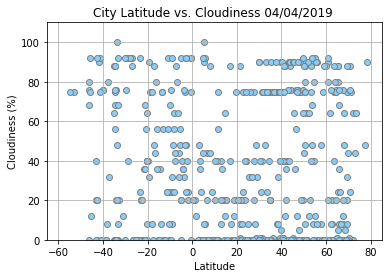

In [63]:
# Cloudiness Relationship

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-65, 85)
plt.ylim(0, 110)
plt.title("City Latitude vs. Cloudiness 04/04/2019 ")
plt.grid()
plt.scatter(x_axis, y_axis_cloudiness,facecolor="lightskyblue", edgecolor="gray")

# Save Figure
plt.savefig("../Images/LatitudeVsCloudinessPct.png")
plt.show()

### Latitudinal Relationship to Wind Speed (MPH)

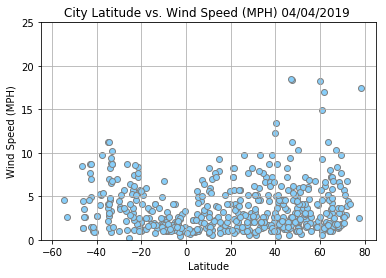

In [64]:
# Wind Speed Relationship 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(-65, 85)
plt.ylim(0, 25)
plt.title("City Latitude vs. Wind Speed (MPH) 04/04/2019 ")
plt.grid()
plt.scatter(x_axis, y_axis_windspeed,facecolor="lightskyblue", edgecolor="gray")

# Save Figure
plt.savefig("../Images/LatitudeVsWindSpeed.png")
plt.show()